Creates a graphical comparison of vertical clothoid from IFC-Rail-Unit-Test-Reference-Code and IfcOpenShell

RuntimeError: Failed to process shape

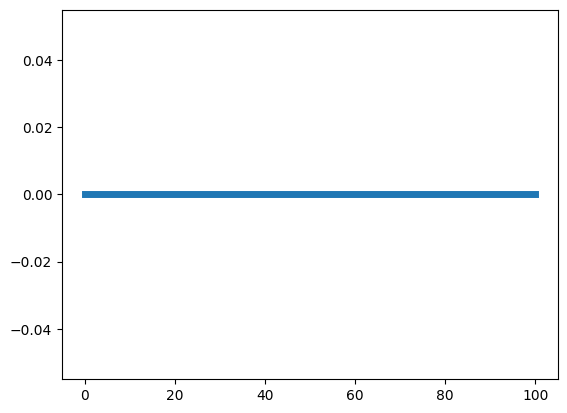

In [1]:
import ifcopenshell
import ifcopenshell.geom as geom
import numpy as np
import matplotlib.pyplot as plt

test_cases = []
test_cases.append("Clothoid_100.0_10.0_0.0_0.5_1_Meter")
test_cases.append("Clothoid_100.0_10.0_0.0_-0.5_1_Meter")
test_cases.append("Clothoid_100.0_10.0_0.5_0.0_1_Meter")
test_cases.append("Clothoid_100.0_10.0_-0.5_0.0_1_Meter")
test_cases.append("Clothoid_100.0_10.0_0.5_1.0_1_Meter")
test_cases.append("Clothoid_100.0_10.0_-0.5_-1.0_1_Meter")
test_cases.append("Clothoid_100.0_10.0_1.0_0.5_1_Meter")
test_cases.append("Clothoid_100.0_10.0_-1.0_-0.5_1_Meter")

for test_case in test_cases:
    model = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__VerticalAlignment_" + test_case + ".ifc")
    results_file = "F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/ToolboxProcessed/VerticalAlignment/Clothoid/" + test_case + ".txt"
    with open(results_file,'r') as f:
        lines = f.readlines()[2:] # skip the first two header lines
    
    x_values = []
    z_values = []
    for line in lines:
        s,x,z = map(float,line.split())
        x_values.append(x)
        z_values.append(z)
    
    fig1 = plt.figure().add_subplot()
    fig1.plot(x_values,z_values,label="RailRoom",linewidth=5)

    curves = model.by_type("IfcGradientCurve",False)
   
    settings = geom.settings()
    
    
    for curve in curves:
        shape = geom.create_shape(settings,curve)
        verts = shape.verts
        verts = np.array(verts).reshape((-1,3))
        x,y,z = verts.T
        fig1.plot(x,z,label="IfcOpenShell")
        
    fig1.set_title(test_case)
    fig1.legend(loc="upper left")
    fig1.axis("square")
    fig1.set_xlabel("X")
    fig1.set_ylabel("Y")
    fig1.grid(True)
    plt.show()
